In [1]:

!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time


In [3]:
#!pip install split-folders

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [5]:

train_data_dir = "/content/drive/MyDrive/Final Graphite/train"
test_data_dir = "/content/drive/MyDrive/Final Graphite/test"
val_data_dir = "/content/drive/MyDrive/Final Graphite/val"

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         )

validation_data = tf.keras.utils.image_dataset_from_directory(val_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 854 files belonging to 2 classes.
Found 130 files belonging to 2 classes.
Found 332 files belonging to 2 classes.


In [7]:
class_names = train_data.class_names
class_names

['92%', '97%']

In [8]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


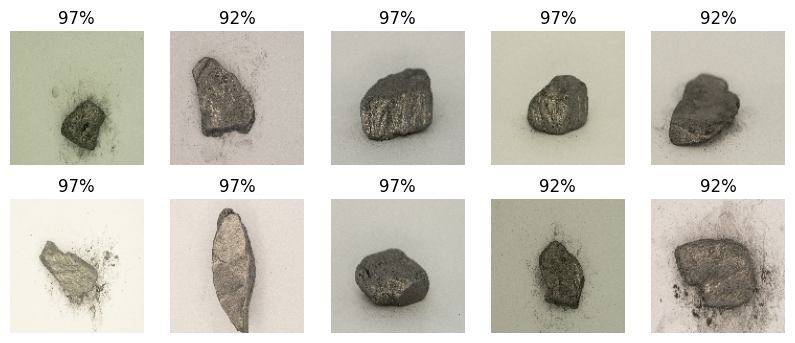

In [9]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [10]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[178.52611 188.52611 161.52611]
   [179.24008 187.24008 163.24008]
   [177.54707 187.54707 162.54707]
   ...
   [184.13138 194.13138 167.13138]
   [185.07442 194.07442 167.07442]
   [179.28586 189.28586 164.28586]]

  [[176.73508 186.73508 159.73508]
   [180.57152 190.27074 163.27074]
   [176.00781 186.00781 161.00781]
   ...
   [182.1824  192.1824  165.1824 ]
   [183.85037 193.85037 166.85037]
   [185.65375 195.30609 168.30609]]

  [[180.66426 190.66426 163.66426]
   [176.71756 186.71756 161.71756]
   [178.63998 186.63998 162.63998]
   ...
   [184.86491 194.86491 167.86491]
   [181.1291  191.1291  164.1291 ]
   [184.67084 194.67084 167.67084]]

  ...

  [[180.13509 189.13509 162.13509]
   [179.41307 188.41307 161.41307]
   [180.66995 188.66995 164.66995]
   ...
   [183.75    193.75    168.75   ]
   [186.50821 196.50821 171.50821]
   [184.11101 194.11101 169.11101]]

  [[180.91336 189.91336 162.91336]
   [184.39453 192.74219 167.69922]
   [179.23808 189.23808 164.23808]
 

In [11]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [12]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.81460917 0.79107976 0.74402094]
   [0.8038268  0.78814054 0.7410817 ]
   [0.83422756 0.81069815 0.76363933]
   ...
   [0.81868875 0.8030025  0.75644916]
   [0.8120251  0.79633886 0.74928004]
   [0.81945753 0.80377126 0.75671244]]

  [[0.82084864 0.79731923 0.7502604 ]
   [0.8243241  0.80079466 0.75373584]
   [0.816502   0.79297256 0.74591374]
   ...
   [0.8101572  0.7944709  0.7474121 ]
   [0.8146666  0.79898036 0.75192153]
   [0.8173694  0.8016831  0.7546243 ]]

  [[0.81527174 0.7917423  0.7446835 ]
   [0.83214134 0.8086119  0.7615531 ]
   [0.8279699  0.8044405  0.7573817 ]
   ...
   [0.8144828  0.79879653 0.7517377 ]
   [0.8277995  0.8121132  0.7650544 ]
   [0.83243525 0.816749   0.76969016]]

  ...

  [[0.78275794 0.7592285  0.7121697 ]
   [0.7827608  0.7670745  0.7200157 ]
   [0.76497203 0.74928576 0.70222694]
   ...
   [0.76498735 0.7493011  0.70224226]
   [0.7737295  0.7580432  0.7109844 ]
   [0.79222196 0.7765357  0.72947687]]

  [[0.73966664 0.7128035  0.664378

In [13]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(128,128,3),
                                                           weights="imagenet",
                                                           pooling='max')

for layer in pretrained_model.layers:
        layer.trainable=False

In [15]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,144,425 (80.66 MB)

 Trainable params: 282,945 (1.08 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [18]:
start_time = time.time()
history = model.fit(train_data,
                    epochs=6,
                    validation_data=validation_data)

end_time = time.time()


Epoch 1/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 132s 4s/step - accuracy: 0.6976 - loss: 0.5996 - val_accuracy: 0.8154 - val_loss: 0.3656
Epoch 2/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.8587 - loss: 0.3241 - val_accuracy: 0.8538 - val_loss: 0.3715
Epoch 3/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9090 - loss: 0.2413 - val_accuracy: 0.8769 - val_loss: 0.3061
Epoch 4/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.9214 - loss: 0.1961 - val_accuracy: 0.9000 - val_loss: 0.2246
Epoch 5/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.9783 - loss: 0.0951 - val_accuracy: 0.9077 - val_loss: 0.2348
Epoch 6/6
27/27 ━━━━━━━━━━━━━━━━━━━━ 119s 4s/step - accuracy: 0.9686 - loss: 0.1010 - val_accuracy: 0.9077 - val_loss: 0.1857


In [19]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 791.079 seconds


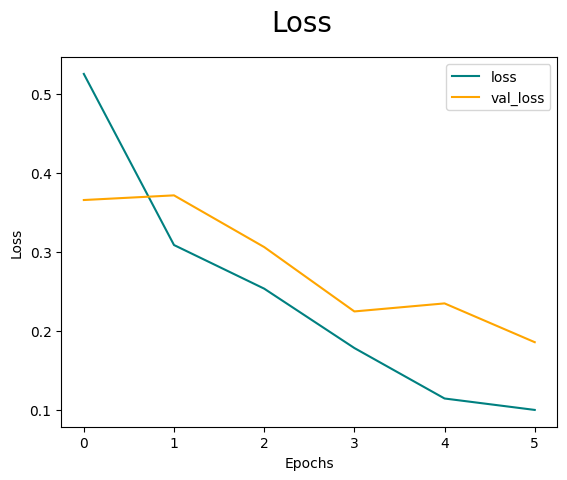

In [20]:


fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epochs')      # Name for the x-axis
plt.ylabel('Loss')        # Name for the y-axis
plt.legend()
plt.show()


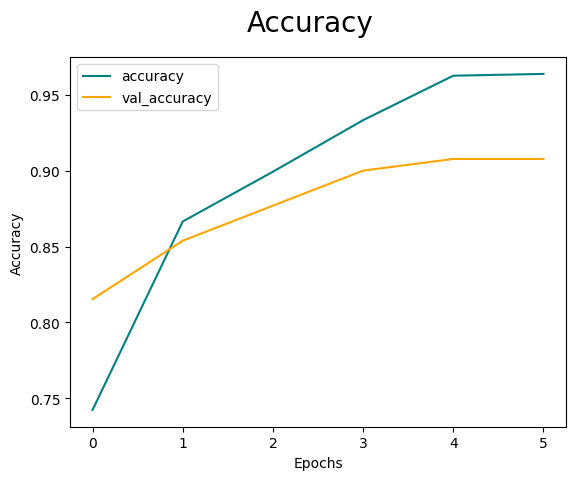

In [21]:


fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epochs')      # Label for the x-axis
plt.ylabel('Accuracy')    # Label for the y-axis
plt.legend()
plt.show()


In [22]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()


In [23]:

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [24]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9437500238418579>

In [25]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.898809552192688>

In [26]:
accuracy.result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.9216867685317993>

#**TEST**

In [27]:
!pip install opencv-python -q

In [28]:
import cv2



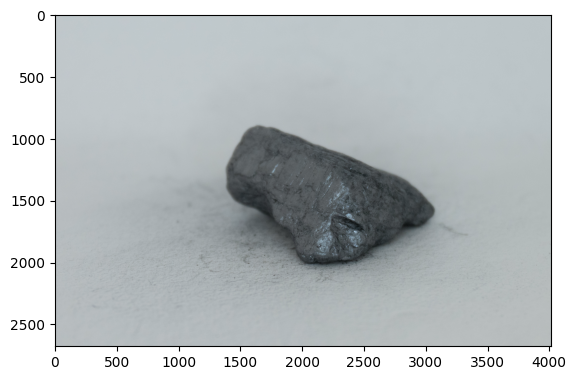

In [30]:
img = cv2.imread('/content/drive/MyDrive/graphite original photos/97%/DSC00158.jpg')
plt.imshow(img)
plt.show()

In [31]:

resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [32]:
scaled_image.shape


TensorShape([128, 128, 3])

In [33]:
np.expand_dims(scaled_image, 0).shape


(1, 128, 128, 3)

In [34]:
yhat = model.predict(np.expand_dims(scaled_image, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [35]:
yhat


array([[0.9932568]], dtype=float32)

In [36]:
class_names


['92%', '97%']

In [37]:

if yhat < 0.5:
    print(f'{class_names[0]}')
else:
    print(f'{class_names[1]}')

97%
